ART Statistics:
  Bulk Loading - Mean: 3.145s, StdDev: 0.273s
  Candidate Retrieval - Mean: 0.001s, StdDev: 0.003s

Baseline Statistics:
  Bulk Loading - Mean: 3.111s, StdDev: 0.143s
  Candidate Retrieval - Mean: 0.001s, StdDev: 0.004s

A/B Testing Results:
  Bulk Loading - t-statistic: 0.760, p-value: 4.508e-01
  Candidate Retrieval - t-statistic: -0.393, p-value: 6.959e-01
  Bulk Loading: No statistically significant difference.
  Candidate Retrieval: No statistically significant difference.


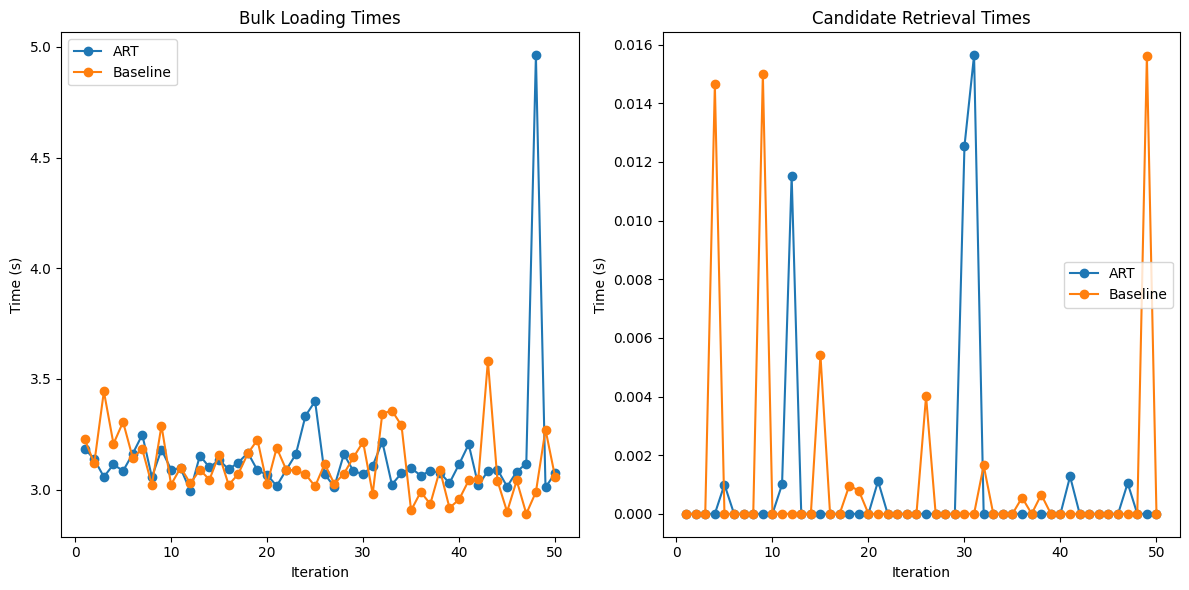

In [50]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Load the CSV files
art_results = pd.read_csv("iteration_results_art.csv")
baseline_results = pd.read_csv("iteration_results.csv")

# Calculate basic statistics
def calculate_statistics(df, label):
    bulk_mean = df["Time_Bulk_Loading"].mean()
    bulk_std = df["Time_Bulk_Loading"].std()
    candidate_mean = df["Time_Candidate_Retrieval"].mean()
    candidate_std = df["Time_Candidate_Retrieval"].std()

    print(f"{label} Statistics:")
    print(f"  Bulk Loading - Mean: {bulk_mean:.3f}s, StdDev: {bulk_std:.3f}s")
    print(f"  Candidate Retrieval - Mean: {candidate_mean:.3f}s, StdDev: {candidate_std:.3f}s")
    print()

    return bulk_mean, bulk_std, candidate_mean, candidate_std

art_bulk_mean, art_bulk_std, art_candidate_mean, art_candidate_std = calculate_statistics(art_results, "ART")
baseline_bulk_mean, baseline_bulk_std, baseline_candidate_mean, baseline_candidate_std = calculate_statistics(baseline_results, "Baseline")

# Perform A/B testing (Paired t-test)
print("A/B Testing Results:")
bulk_t_stat, bulk_p_value = stats.ttest_rel(art_results["Time_Bulk_Loading"], baseline_results["Time_Bulk_Loading"])
candidate_t_stat, candidate_p_value = stats.ttest_rel(art_results["Time_Candidate_Retrieval"], baseline_results["Time_Candidate_Retrieval"])

print(f"  Bulk Loading - t-statistic: {bulk_t_stat:.3f}, p-value: {bulk_p_value:.3e}")
print(f"  Candidate Retrieval - t-statistic: {candidate_t_stat:.3f}, p-value: {candidate_p_value:.3e}")

# Interpret the results
alpha = 0.05
if bulk_p_value < alpha:
    print("  Bulk Loading: Statistically significant difference.")
else:
    print("  Bulk Loading: No statistically significant difference.")

if candidate_p_value < alpha:
    print("  Candidate Retrieval: Statistically significant difference.")
else:
    print("  Candidate Retrieval: No statistically significant difference.")

# Visualization
plt.figure(figsize=(12, 6))

# Bulk Loading Times
plt.subplot(1, 2, 1)
plt.plot(art_results["Iteration"], art_results["Time_Bulk_Loading"], label="ART", marker="o")
plt.plot(baseline_results["Iteration"], baseline_results["Time_Bulk_Loading"], label="Baseline", marker="o")
plt.title("Bulk Loading Times")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

# Candidate Retrieval Times
plt.subplot(1, 2, 2)
plt.plot(art_results["Iteration"], art_results["Time_Candidate_Retrieval"], label="ART", marker="o")
plt.plot(baseline_results["Iteration"], baseline_results["Time_Candidate_Retrieval"], label="Baseline", marker="o")
plt.title("Candidate Retrieval Times")
plt.xlabel("Iteration")
plt.ylabel("Time (s)")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
# Load the new CSV files
art_results_sf1 = pd.read_csv("iteration_results_art_sf1.csv")
baseline_results_sf1 = pd.read_csv("iteration_results_sf1.csv")

# Define the calculate_statistics function
def calculate_statistics(df, label):
    bulk_mean = df["Time_Bulk_Loading"].mean()
    bulk_std = df["Time_Bulk_Loading"].std()
    bulk_min = df["Time_Bulk_Loading"].min()
    bulk_max = df["Time_Bulk_Loading"].max()
    # candidate_mean = df["Time_Candidate_Retrieval"].mean()
    # candidate_std = df["Time_Candidate_Retrieval"].std()

    print(f"{label} Statistics:")
    print(f"  Bulk Loading - Mean: {bulk_mean:.3f}s, StdDev: {bulk_std:.3f}s, Min: {bulk_min:.3f}s, Max: {bulk_max:.3f}s")

    # print(f"  Candidate Retrieval - Mean: {candidate_mean:.3f}s, StdDev: {candidate_std:.3f}s")
    print()

    return bulk_mean, bulk_std, candidate_mean, candidate_std

# Calculate basic statistics
art_bulk_mean, art_bulk_std, art_candidate_mean, art_candidate_std = calculate_statistics(art_results_sf1, "ART")
baseline_bulk_mean, baseline_bulk_std, baseline_candidate_mean, baseline_candidate_std = calculate_statistics(baseline_results_sf1, "B-Tree")

# Plot a table with the statistics

KeyError: 'Time_Candidate_Retrieval'

- Bulk load remove pattern, plot as boxplots
- Same color for same structure tree


Top 10 Most Common Trigrams (Relative Frequencies):
  s: 1.77%
  b: 1.45%
  p: 1.45%
  c: 1.29%
  m: 1.29%
  l: 1.13%
  d: 0.81%
  g: 0.80%
  t: 0.65%
er : 0.65%


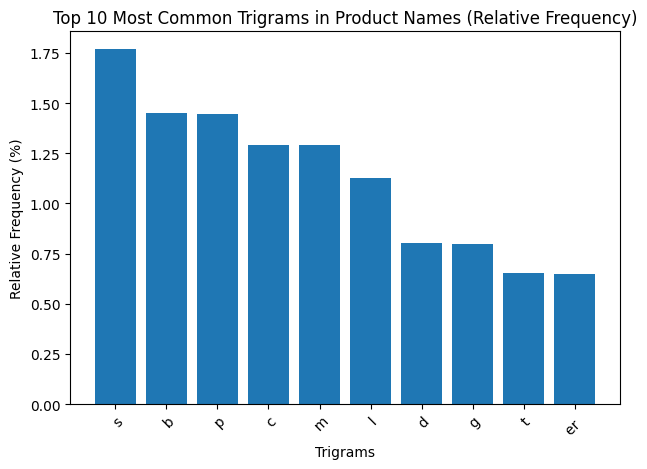

In [61]:
# Calculate the total number of trigrams
total_trigrams = sum(trigram_counts.values())

# Convert absolute counts to relative frequencies (percentages)
relative_trigram_counts = {trigram: (count / total_trigrams) * 100 for trigram, count in trigram_counts.items()}

# Get the top 10 most common trigrams with their relative frequencies
most_common_relative_trigrams = sorted(relative_trigram_counts.items(), key=lambda x: x[1], reverse=True)[:10]

# Print the top 10 most common trigrams with their relative frequencies
print("Top 10 Most Common Trigrams (Relative Frequencies):")
for trigram, freq in most_common_relative_trigrams:
    print(f"{trigram}: {freq:.2f}%")

# Plot the relative frequency distribution
trigram_labels, trigram_freqs = zip(*most_common_relative_trigrams)
plt.bar(trigram_labels, trigram_freqs)
plt.title("Top 10 Most Common Trigrams in Product Names (Relative Frequency)")
plt.xlabel("Trigrams")
plt.ylabel("Relative Frequency (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [56]:
from collections import Counter

# Define ascii_distribution
ascii_distribution = Counter(ascii_characters)

# Calculate the total count of ASCII characters
total_ascii_count = sum(ascii_distribution.values())

# Convert absolute counts to percentages
ascii_percentage_distribution = {char: (count / total_ascii_count) * 100 for char, count in ascii_distribution.items()}

# Print the percentage distribution
print("ASCII Character Percentage Distribution:")
for char, percentage in sorted(ascii_percentage_distribution.items(), key=lambda x: x[1], reverse=True):
    print(f"'{char}': {percentage:.2f}%")


ASCII Character Percentage Distribution:
' ': 12.21%
'e': 9.62%
'a': 7.63%
'o': 7.15%
'r': 6.30%
'n': 6.14%
'l': 6.13%
'i': 5.63%
's': 4.47%
'd': 4.00%
't': 3.99%
'm': 3.15%
'c': 2.99%
'h': 2.99%
'u': 2.65%
'y': 2.16%
'p': 2.16%
'b': 1.99%
'g': 1.99%
'w': 1.66%
'f': 1.49%
'k': 1.48%
'v': 0.99%
'q': 0.66%
'j': 0.17%
'z': 0.17%


In [57]:
# Split all product names into words and flatten the list
all_words = [word for name in product_names for word in name.split()]

# Count the number of unique words
unique_words_count = len(set(all_words))

print(f"Number of unique words in product names: {unique_words_count}")

Number of unique words in product names: 92


In [58]:
all_words

['blush',
 'thistle',
 'blue',
 'yellow',
 'saddle',
 'spring',
 'green',
 'yellow',
 'purple',
 'cornsilk',
 'cornflower',
 'chocolate',
 'smoke',
 'green',
 'pink',
 'forest',
 'brown',
 'coral',
 'puff',
 'cream',
 'bisque',
 'cornflower',
 'lawn',
 'forest',
 'magenta',
 'moccasin',
 'green',
 'thistle',
 'khaki',
 'floral',
 'misty',
 'lace',
 'thistle',
 'snow',
 'royal',
 'thistle',
 'dim',
 'navajo',
 'dark',
 'gainsboro',
 'linen',
 'pink',
 'saddle',
 'puff',
 'powder',
 'spring',
 'maroon',
 'seashell',
 'almond',
 'orchid',
 'cornflower',
 'wheat',
 'orange',
 'maroon',
 'ghost',
 'ghost',
 'olive',
 'orange',
 'rosy',
 'thistle',
 'khaki',
 'seashell',
 'rose',
 'cornsilk',
 'navajo',
 'blanched',
 'honeydew',
 'sky',
 'turquoise',
 'medium',
 'deep',
 'sky',
 'turquoise',
 'drab',
 'peach',
 'indian',
 'navy',
 'coral',
 'pink',
 'deep',
 'turquoise',
 'indian',
 'lemon',
 'lavender',
 'misty',
 'chocolate',
 'navy',
 'tan',
 'deep',
 'brown',
 'ivory',
 'navy',
 'honeyde

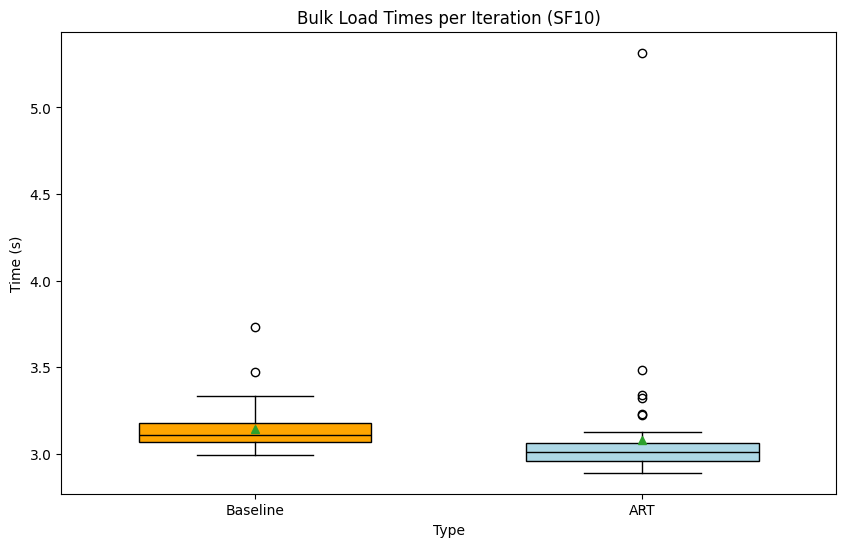

In [46]:

# Load the CSVs
artsf1 = pd.read_csv("iteration_results2.csv")["Time_Bulk_Loading"]
basesf1 = pd.read_csv("iteration_results_art2.csv")["Time_Bulk_Loading"]

# Prepare figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Draw two boxplots by hand: baseline first, then ART
data = [basesf1, artsf1]
positions = [1, 2]
bp = ax.boxplot(
    data,
    positions=positions,
    widths=0.6,
    patch_artist=True,
    showmeans=True,
    meanline=False,
    labels=["Baseline", "ART"]
)

# Set the fill colors
bp["boxes"][0].set_facecolor("orange")
bp["boxes"][1].set_facecolor("lightblue")

# Force all other elements to black
for element in ("whiskers", "caps", "medians", "means", "fliers"):
    for line in bp[element]:
        line.set(color="black")

# Ticks in green
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

# Labels & title
ax.set_xlabel("Type")
ax.set_ylabel("Time (s)")
ax.set_title("Bulk Load Times per Iteration (SF10)")
plt.show()

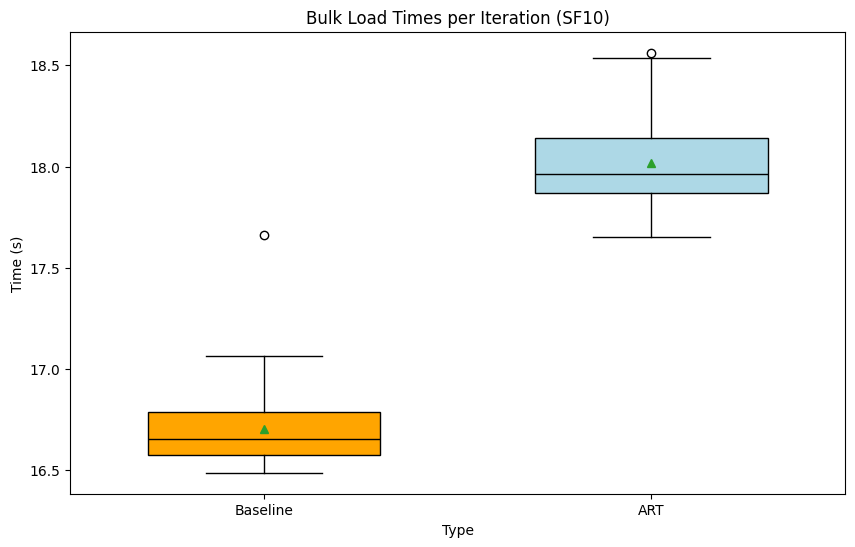

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSVs
artsf10 = pd.read_csv("iteration_results_art2_sf10.csv")["Time_Bulk_Loading"]
basesf10 = pd.read_csv("iteration_results2_sf10.csv")["Time_Bulk_Loading"]

# Prepare figure & axes
fig, ax = plt.subplots(figsize=(10, 6))

# Draw two boxplots by hand: baseline first, then ART
data = [basesf10, artsf10]
positions = [1, 2]
bp = ax.boxplot(
    data,
    positions=positions,
    widths=0.6,
    patch_artist=True,
    showmeans=True,
    meanline=False,
    labels=["Baseline", "ART"]
)

# Set the fill colors
bp["boxes"][0].set_facecolor("orange")
bp["boxes"][1].set_facecolor("lightblue")

# Force all other elements to black
for element in ("whiskers", "caps", "medians", "means", "fliers"):
    for line in bp[element]:
        line.set(color="black")

# Ticks in green
ax.tick_params(axis="x", colors="black")
ax.tick_params(axis="y", colors="black")

# Labels & title
ax.set_xlabel("Type")
ax.set_ylabel("Time (s)")
ax.set_title("Bulk Load Times per Iteration (SF10)")
plt.show()


In [48]:
artsf1_like = pd.read_csv("iteration_results_art2.csv")["Time_Candidate_Retrieval"]
basesf1_like = pd.read_csv("iteration_results2.csv")["Time_Candidate_Retrieval"]
artsf1_like_avg = artsf1_like.mean()
basesf1_like_avg = basesf1_like.mean()

print(f"Average Candidate Retrieval Time for ART: {artsf1_like_avg:.6f}")
print(f"Average Candidate Retrieval Time for Baseline: {basesf1_like_avg :.6f}")

Average Candidate Retrieval Time for ART: 0.002071
Average Candidate Retrieval Time for Baseline: 0.000702


In [49]:
artsf1_like = pd.read_csv("iteration_results_art2_sf10.csv")["Time_Candidate_Retrieval"]
basesf1_like = pd.read_csv("iteration_results2_sf10.csv")["Time_Candidate_Retrieval"]
artsf1_like_avg = artsf1_like.mean()
basesf1_like_avg = basesf1_like.mean()

print(f"Average Candidate Retrieval Time for ART: {artsf1_like_avg:.6f}")
print(f"Average Candidate Retrieval Time for Baseline: {basesf1_like_avg :.6f}")

Average Candidate Retrieval Time for ART: 0.017884
Average Candidate Retrieval Time for Baseline: 0.019821
